# OpenPronounce

This project provides tools for analyzing and improving English pronunciation using AI models.
It compares audio files against expected text, providing detailed feedback on phonemes and prosody, and visualizing visemes.

It leverages Wav2Vec 2.0 for audio feature extraction and DTW for phoneme alignment.

In [59]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [60]:
# Convert mp3 file to exploitable audio
import audio

audio_path = "assets/example.mp3"

# If running in Colab, download the file if it does not exist locally
import os
if not os.path.exists(audio_path):
    import urllib.request
    audio_url = "https://raw.githubusercontent.com/Halleck45/OpenPronounce/main/assets/example.mp3"
    os.makedirs("assets", exist_ok=True)
    print("Downloading example.mp3 from GitHub...")
    urllib.request.urlretrieve(audio_url, audio_path)
    print("Download complete.")

sound = audio.load(audio_path)

## Pronunciation

Pronunciation is the process of speaking a word or phrase correctly.

The model we use is a Wav2Vec2 model. It is a model that is trained to extract features from audio.

This model is trained on a large corpus of English audio and text, but has limitations. For example, it may not be able to recognize sentences from children.

In [61]:
# We try to evalute the pronunciation

import speech
prediction = speech.compare_audio_with_text(sound, "Hello, how are you?")

print(prediction)

{'score': 43.86, 'distance': 787, 'differences': {'word_distance': 6, 'phoneme_distance': 169.0, 'errors': [{'position': 0, 'expected': 'həloʊ', 'actual': 'hɛl', 'word': 'Hello,'}, {'position': 2, 'expected': 'ɑːɹ', 'actual': 'huː', 'word': 'are'}, {'position': 1, 'expected': 'haʊ', 'actual': 'noʊ', 'word': 'how'}], 'feedback': '🔊 Feedback on your pronunciation:\n❌ You need to better pronounce these words: are, Hello,, how\n', 'transcribe': 'HELL NO WHO ARE YOU', 'expected_vector': [104.0, 601.0, 108.0, 108.0, 111.0, 111.0, 650.0, 32.0, 104.0, 97.0, 650.0, 32.0, 593.0, 720.0, 633.0, 32.0, 106.0, 117.0, 720.0], 'transcribed_vector': [104.0, 603.0, 108.0, 32.0, 110.0, 111.0, 650.0, 32.0, 104.0, 117.0, 720.0, 32.0, 593.0, 720.0, 633.0, 32.0, 106.0, 117.0, 720.0], 'expected_phonemes': ['həloʊ', 'haʊ', 'ɑːɹ', 'juː'], 'transcribed_phonemes': ['hɛl', 'noʊ', 'huː', 'ɑːɹ', 'juː'], 'words_with_errors': {'are', 'Hello,', 'how'}}, 'feedback': '🔊 Feedback on your pronunciation:\n❌ You need to bette

In [62]:
# We display specific errors

for error in prediction['differences']['errors']:
    print(error)

{'position': 0, 'expected': 'həloʊ', 'actual': 'hɛl', 'word': 'Hello,'}
{'position': 2, 'expected': 'ɑːɹ', 'actual': 'huː', 'word': 'are'}
{'position': 1, 'expected': 'haʊ', 'actual': 'noʊ', 'word': 'how'}


## Prosody

Now we'll look at the prosody of the audio. The prosody is the rhythm and intonation of the audio.

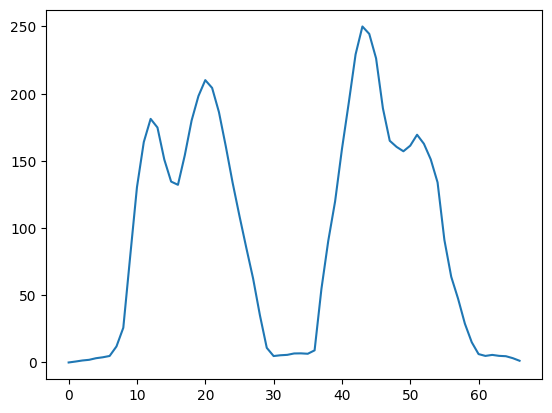

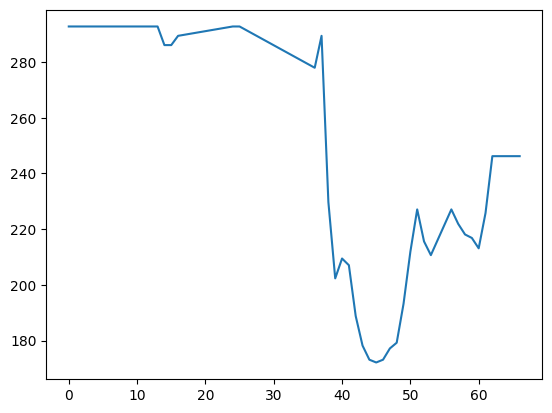

In [63]:
prosody = prediction['prosody']
energy = prosody['energy']

# Create a graph of the energy 
# (the amplitude of the audio. For example, when you speak louder, the energy is higher)
import matplotlib.pyplot as plt

plt.plot(energy)
plt.show()

f0 = prosody['f0']

# Create a graph of the f0 
# (the pitch of the audio. For example, when you ask a question, the pitch is higher)
plt.plot(f0)
plt.show()